In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import cm
import random
import string


def generateRandomSample(fontPath, picSize=(400*4,50*4)):
  im = Image.new('RGB', picSize, color=('#FFFFFF'))
  font = ImageFont.truetype(fontPath, size=80)
  draw_text = ImageDraw.Draw(im)
  draw_text.text(
      (5, 5),
      generate_random_string(20),
      font=font,
      fill='#000000')
  return im


def generate_random_string(length):
  letters = string.ascii_letters
  rand_string = ''.join(random.choice(letters) for i in range(length))
  # print("Random string of length", length, "is:", rand_string)
  return "ABCDEFGHIJKLMNOPQRSTUVWXY\nabcdefghijklmnopqrstuvwxyz"
  # return rand_string

In [ ]:
contrast = ('High Contrast', 'nonHC')
classificationArr = ('Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten')

In [ ]:
contrast

'nonHC'

In [ ]:
import os

base = []
num_skipped = 0
cnt = 0
for folder_name in (contrast):
    folder_path = os.path.join("/content/drive/MyDrive/colabData/fontData/data/contrast/", folder_name)
    for fname in os.listdir(folder_path):
        cnt += 1
        fpath = os.path.join(folder_path, fname)
        # print(fpath)
        # print('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.png')
        # fullName = '/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.jpg'
        # for i in range(20):
        base.append({'name':fname, 'image':generateRandomSample(fpath)})
          # print("!")
    #     if cnt == 5:
    #       break
    # break
    print('Подготовлено шрифтов:', cnt)
# base

Подготовлено шрифтов: 4
Подготовлено шрифтов: 730


In [ ]:
!pip install pyaztro

In [ ]:
import pyaztro
from google.colab import widgets
import ipywidgets
from IPython.display import display, clear_output
import pandas as pd

In [ ]:
classify = []

In [ ]:
def setup():
  global name
  img = base.pop()
  grid = widgets.Grid(1, 2, header_row=True, header_column=True) 
  newsize = (400*4, 50*4)
  display(img['image'].resize(newsize))
  name = img['name']
  for (row, col) in grid:
    index = row*6+col
    # print("\n")
    # print("\n"+"Choose!"+"\n")
    display(button_list[index])

In [ ]:
# myIterator = 0
name = ''
def on_button_clicked(button):
  # Display the message within the output widget.
  # with output:
  global name
  clear_output()
  sign_name = str(button.description)
  # next = myIterator+1
  classify.append((name, sign_name))
  
  print(name, 'save as', sign_name)
  # with grid.output_to(0, 0):
  #   display(image_name[(1)]['image'].resize(newsize))
  setup()
  

In [ ]:
category = ['Display', 'Handwritten', 'Monospased', 'Sans Serif', 'Serif']
# category = ['High Contrast', 'None High Contrast']
button_list = []
for i in range(0,2):
  button = ipywidgets.widgets.Button(description=category[i])
  button.on_click(on_button_clicked)
  button_list.append(button)  
# def a():
#   setup()

Playball.ttf save as High Contrast


,


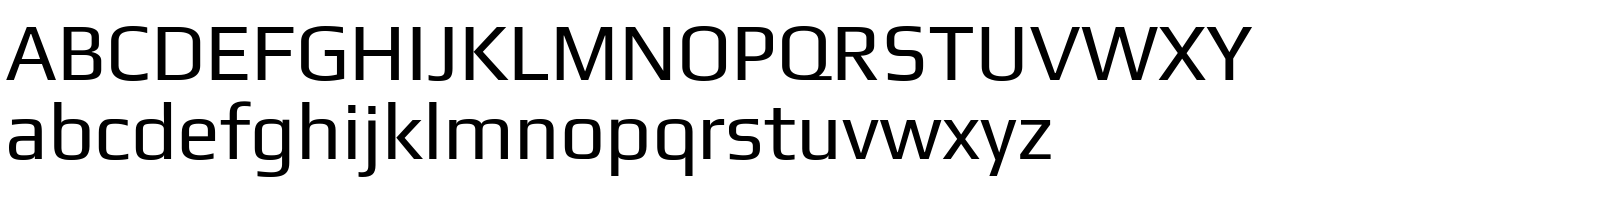

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='High Contrast', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='None High Contrast', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [ ]:
setup()

In [ ]:
classify[0][0]

'Zilla Slab.ttf'

In [ ]:
classify[0]

('Zilla Slab.ttf', 'None High Contrast')

In [ ]:
import os

ratio = [1]
num_skipped = 0
cnt = 0
# for idx, folder_name in enumerate(['High Contrast', 'None High Contrast']):
folder_path = "/content/drive/MyDrive/colabData/fontData/data/contrast/nonHC/"
cnt = 0
for fname in classify:
    if fname[0] in os.listdir(folder_path):
      cnt += 1
      fpath = os.path.join(folder_path, fname[0])
      folder_name = fname[1]
      # print(fpath)
      os.replace(fpath, '/content/drive/MyDrive/colabData/fontData/data/manualContrast/'+folder_name+'/'+fname[0])
      # print(fpath)
      # print('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.png')
      # fullName = '/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.jpg'
      samples = 20
      quantity = int(max(ratio)/ratio[0])
      # for i in range(samples):
      #   generateRandomSample(fpath).save('/content/drive/MyDrive/colabData/fontData/data/manualContrast/'+folder_name+'/'+fname[0][:-4]+str(i)+'.jpg')
      # print("!")
#     if cnt == 5:
#       break
# break
print('Подготовлено шрифтов типа {}: {} в количестве {}x{} экземпляров на один шрифт'.format(folder_name, cnt, samples, quantity))